In [118]:
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

data = pd.read_csv("SYPS cohort83_4_sweep1.csv")
file1 = pd.read_csv("rec36_scesubj2.csv")
file2 = pd.read_csv("rec40_scesbjq.csv")
file3 = pd.read_csv("rec42_othrsubj.csv")
file4 = pd.read_csv("rec43_schlqual.csv")
file5= pd.read_csv("rec44_modschl.csv")

In [119]:
data.head()

,publicid,rewghtcv,achievev,cohortv,leaverv,questv,versionv,frthokv,truant2v,ptjb4thv,...,addrdetl,addrelv,scotvecv,commentv,mcoderv,change1v,change2v,rday,rmonth,type
0,100007,1.16057300567627,1,1,1,2,1,2,2,1,...,2,2,98,2,8,1,1,29,4,2
1,100014,.79980605840683,1,1,1,2,1,1,4,2,...,2,2,98,2,6,1,1,11,4,2
2,100021,1.11099815368653,1,1,1,2,1,2,1,2,...,2,2,98,2,6,0,0,11,4,2
3,100028,1.11099815368653,1,1,1,2,2,1,1,2,...,2,2,2,1,4,1,0,2,4,2
4,100035,1.11099815368653,1,1,1,2,1,1,3,2,...,2,2,1,1,1,0,0,28,3,2


In [120]:
file1.head()

,publicid,subjnov,subj4ov,subj3std,subj4std,subj5std
0,100007,1,9,5,5,98
1,100007,14,9,5,5,98
2,100007,16,9,5,5,98
3,100007,33,9,5,5,98
4,100007,41,9,5,5,98


In [121]:
file2.head()

,publicid,subjnov,studl5v,studl5ov,studl5hv,std5othv,stdqulv
0,100063,1,1,1,2,2,999
1,100063,13,1,1,2,2,999
2,100063,14,1,1,2,2,999
3,100063,50,1,1,2,2,999
4,100063,62,1,2,2,2,999


In [122]:
file3.head()

,publicid,subjectv,otsbqulv,otsbgrdv,otsb5yrv
0,100028,316,81,8,2
1,100028,801,81,8,2
2,100028,902,81,6,2
3,100315,607,92,6,2
4,100511,611,81,8,2


In [123]:
file4.head()

,publicid,qualv,num5intv,plan6v
0,100077,85,98,2
1,100077,86,98,1
2,100077,95,98,3
3,100091,75,98,1
4,100091,85,98,3


# How many brothers do you have?

In [124]:
data.shape

(8076, 254)

In [125]:
data=data.loc[data['achievev']==1]

In [126]:
data.shape

(6501, 254)

In [127]:
data['brotherv'].unique()

array([ 2,  1,  0, 99,  3,  4,  5,  7,  6,  9,  8, 10])

In [128]:
data['brotherv'].value_counts()

1     2571
0     1398
2     1156
99     774
3      396
4      124
5       57
6       13
7        6
10       2
9        2
8        2
Name: brotherv, dtype: int64

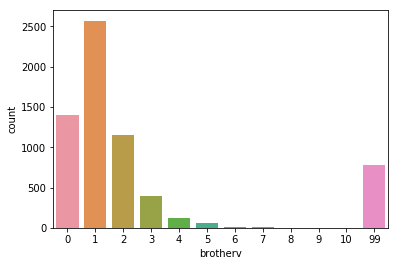

In [129]:
sns.countplot(x='brotherv',data=data)

In [130]:
#show people who answer this question
data_brother=data.loc[data['brotherv']!=99]

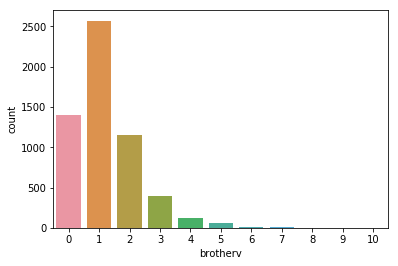

In [131]:
sns.countplot(x='brotherv',data=data_brother)

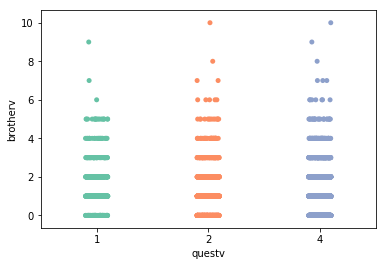

In [132]:
sns.stripplot(x='questv',y='brotherv',data=data_brother,jitter=True,palette="Set2")

# How many sisters do you have?

In [133]:
data['sistersv'].unique()

array([ 2,  1,  0,  3, 99,  4,  6,  5,  7,  8])

In [134]:
data['sistersv'].value_counts()

1     2525
0     1624
2     1096
99     721
3      364
4      105
5       39
6       19
7        4
8        4
Name: sistersv, dtype: int64

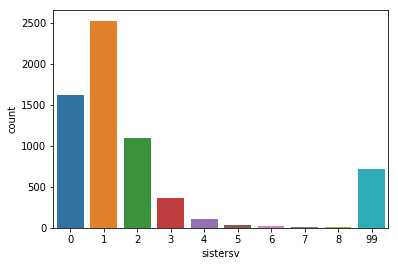

In [135]:
sns.countplot(x='sistersv',data=data)

In [136]:
#show people who answer this question
data_sister=data.loc[data['sistersv']!=99]

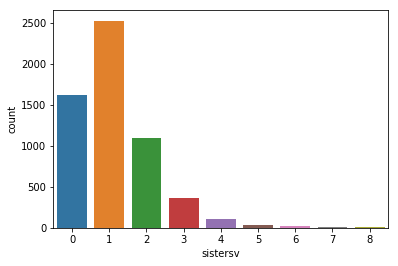

In [137]:
sns.countplot(x='sistersv',data=data_sister)

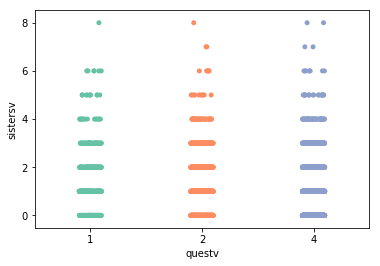

In [138]:
sns.stripplot(x='questv',y='sistersv',data=data_sister,jitter=True,palette="Set2")

# In your fourth year, who did you usually stay with during the school week?

In [139]:
data['staywkv'].unique()

array([ 1,  2,  4, 99,  8,  5,  3,  7,  6])

In [140]:
data['staywkv'].value_counts()

1     5065
4      657
2      252
5      140
99     138
8      109
6       58
3       51
7       31
Name: staywkv, dtype: int64

In [141]:
#show people who answer this question
data_staywith=data.loc[data['staywkv']!=99]

In [142]:
data_staywith['staywkv'].value_counts()
#1- mother and father
#2-mother and step-father
#3-father and step-mother
#4-mother only
#5-father only
#6-boarding school
#7-school hostel
#8-other

1    5065
4     657
2     252
5     140
8     109
6      58
3      51
7      31
Name: staywkv, dtype: int64

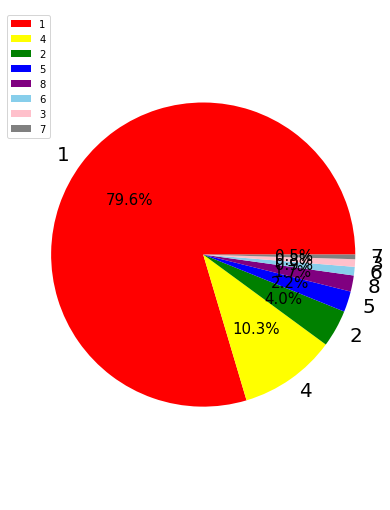

In [143]:
plt.figure(figsize=(6,9))

labels = [1,4,2,5,8,6,3,7]
sizes = [5065,657,252,140,109,58,51,31]
colors = ['red','yellow','green','blue', 'purple','skyblue','pink','grey']
explode = (0,0,0,0,0,0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors, labeldistance = 1.1,autopct = '%3.1f%%',shadow = False, startangle = 0,pctdistance = 0.6)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)
    
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()


# Who do you stay with now?

In [144]:
data['staynowv'].unique()

array([ 1,  8,  5,  2,  4, 99,  3,  7,  6])

In [145]:
data['staynowv'].value_counts()

1     4749
4      702
99     326
2      242
8      206
5      146
6       53
3       50
7       27
Name: staynowv, dtype: int64

In [146]:
#show people who answer this question
data_staynow=data.loc[data['staynowv']!=99]

In [147]:
data_staynow['staynowv'].value_counts()

1    4749
4     702
2     242
8     206
5     146
6      53
3      50
7      27
Name: staynowv, dtype: int64

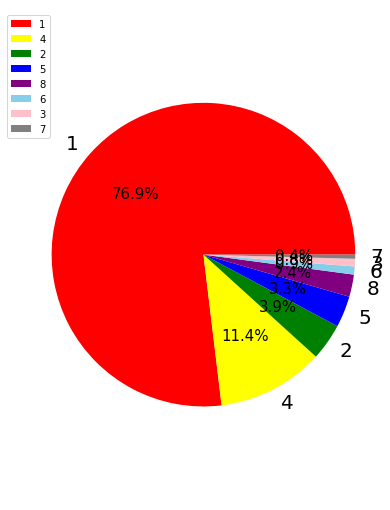

In [148]:
plt.figure(figsize=(6,9))

labels = [1,4,2,5,8,6,3,7]
sizes = [4749,702,242,206,146,53,50,27]
colors = ['red','yellow','green','blue', 'purple','skyblue','pink','grey']
explode = (0,0,0,0,0,0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors, labeldistance = 1.1,autopct = '%3.1f%%',shadow = False, startangle = 0,pctdistance = 0.6)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(15)
    
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
plt.grid()
plt.show()

# (意义不大)How much you give toward board and keep last week？

In [149]:
data['givkeepv'].unique()

array([99999,  1000,  2000,     0,  1500,   700,   500,  1200,   850,
        1700,   600,  1400,   900,   800,  1750,  1650,  8000,   980,
         635,  4000,   750,  1250,   720,  1600,  2400,  2250,  1100,
        1820,   625,   560,  6300,  2500,  2200,  1300,  1800,   575,
        1849,   650,  1375,  3000,  2100,  2460,  3700,   875,  1330,
        4050,  1150,   975,   100,   300,  1050,  1225, 10000,   825,
        1883,  1900,  2799,  1125,  1550,  2045,  1510,   400,    85,
        5000,  1038,   212,  5473,  2125,   200, 11200,  1460,  5254,
         830,  3500,  2600,  1785,  2300,  1060,  1841,  3200,    15,
        4500,   415,   350,   310,  3100,  3846,  3460,  1530,  1741,
        1730,   550,  1320,  1025,  1001,  1306,  3360,  1659,   730,
        4200,  1221,   680,   725,   685,  1542,   315,  1948,  1480,
        1030,  5160,   450,   150])

In [150]:
data['givkeepv'].value_counts()

0        3391
1000     1340
1500      403
99999     298
500       255
2000      103
1200      101
700        97
800        89
600        40
1300       37
750        36
2500       18
1250       18
1100       17
650        15
1800       15
1400       15
1600       15
900        14
1700       12
3000       12
850        10
300         9
625         6
3500        5
1650        5
400         5
1550        4
875         4
         ... 
1025        1
150         1
1849        1
1841        1
1785        1
1741        1
3700        1
310         1
350         1
3360        1
1883        1
1221        1
3200        1
1125        1
1001        1
2045        1
11200       1
450         1
825         1
725         1
685         1
550         1
2799        1
2460        1
830         1
1030        1
85          1
1038        1
1050        1
4050        1
Name: givkeepv, Length: 112, dtype: int64

In [151]:
#show people who answer this question
data_digmoney=data.loc[data['givkeepv']!=99999]

In [152]:
data_digmoney['givkeepv'].value_counts()

0        3391
1000     1340
1500      403
500       255
2000      103
1200      101
700        97
800        89
600        40
1300       37
750        36
1250       18
2500       18
1100       17
1400       15
1800       15
1600       15
650        15
900        14
1700       12
3000       12
850        10
300         9
625         6
3500        5
1650        5
400         5
1550        4
875         4
100         4
         ... 
1025        1
150         1
1849        1
1841        1
1785        1
1741        1
3700        1
310         1
350         1
3360        1
1883        1
1221        1
3200        1
1125        1
1001        1
2045        1
11200       1
450         1
825         1
725         1
685         1
550         1
2799        1
2460        1
830         1
1030        1
85          1
1038        1
1050        1
4050        1
Name: givkeepv, Length: 111, dtype: int64

# father and mother current job

In [153]:
#1- full-time paid employment
#2- part-time paid employment
#3- unemployed and looking for work
#4- retired
#5- full-time working at home
#6- unable to work, eg, disabled
#7- dead
#8- don't know


In [154]:
data['mumnowv'].unique()

array([ 5,  2,  1, 99,  4,  6,  3,  8,  7])

In [155]:
data['mumnowv'].value_counts()

2     1945
1     1883
5     1555
3      399
99     307
6      179
7      103
8       77
4       53
Name: mumnowv, dtype: int64

In [156]:
#show people who answer this question
data_momworknow=data.loc[data['mumnowv']!=99]
data_momworknow=data_momworknow.loc[data_momworknow['mumnowv']!=8]

In [157]:
data_momworknow['mumnowv'].value_counts()

2    1945
1    1883
5    1555
3     399
6     179
7     103
4      53
Name: mumnowv, dtype: int64

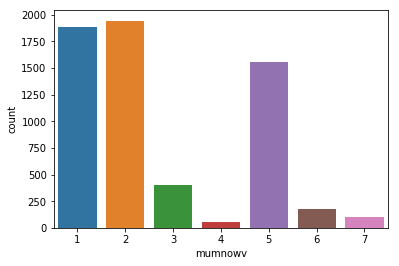

In [158]:
sns.countplot(x='mumnowv',data=data_momworknow)

In [159]:
data['dadnowv'].unique()

array([ 1,  4, 99,  7,  6,  5,  3,  8,  2])

In [160]:
data['dadnowv'].value_counts()

1     4678
3      605
99     347
6      229
7      226
8      159
4      149
2       60
5       48
Name: dadnowv, dtype: int64

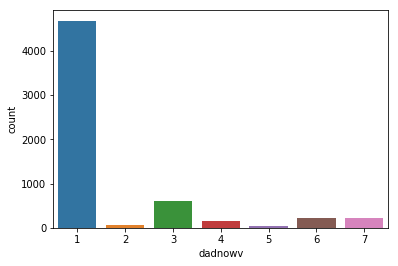

In [161]:
#show people who answer this question
data_dadworknow=data.loc[data['dadnowv']!=99]
data_dadworknow=data_dadworknow.loc[data_dadworknow['dadnowv']!=8]
sns.countplot(x='dadnowv',data=data_dadworknow)

# types of parent's job(具体的含义不明 建议舍弃)

In [162]:
data['mumjob1v'].unique()

array([  9,   6,   5, 999,   1,   4,   3,   2])

In [163]:
data['mumjob1v'].value_counts()

6      3909
9      1244
999     786
1       234
5       159
4       158
3        10
2         1
Name: mumjob1v, dtype: int64

In [164]:
#1- self-employed
#2- YTS mode unkonwn
#3- dirs,chairs, partnrs
#4- mngrs,cos,heads
#5- foremen,supvrs,ncos
#6- empees+ & apprents
#7 YTS non work-based
#8- YTS work-based
#9- F-T work at home

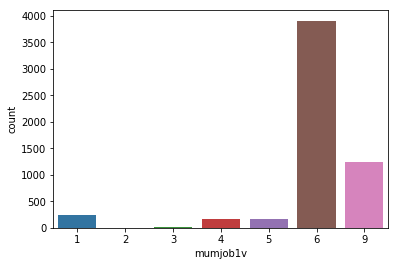

In [165]:
#show people who answer this question
data_momtype=data.loc[data['mumjob1v']!=999]
sns.countplot(x='mumjob1v',data=data_momtype)

In [166]:
data['dadjob1v'].unique()

array([  6,   4,   1, 999,   5,   3,   9,   2])

In [167]:
data['dadjob1v'].value_counts()

6      3516
999    1032
1       817
4       597
5       450
3        72
9        16
2         1
Name: dadjob1v, dtype: int64

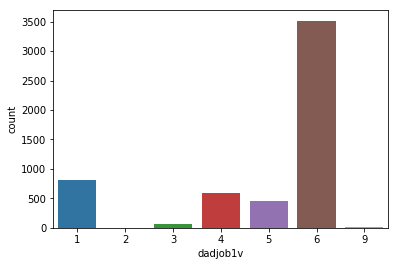

In [168]:
#show people who answer this question
data_dadtype=data.loc[data['dadjob1v']!=999]
sns.countplot(x='dadjob1v',data=data_dadtype)

# How old were you father or mother left school?

In [169]:
#1- 15 years old or less
#2- 16 years old
#3- 17 years old or more
#4- don't know

In [170]:
data['mumschlv'].unique()

array([ 1,  4,  3, 99,  2])

In [171]:
data['mumschlv'].value_counts()

1     3909
2     1051
3      692
4      598
99     251
Name: mumschlv, dtype: int64

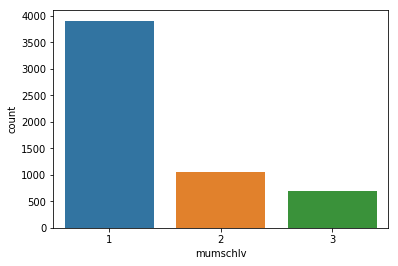

In [172]:
#show people who answer this question
data_momleftsch=data.loc[data['mumschlv']!=99]
data_momleftsch=data_momleftsch.loc[data_momleftsch['mumschlv']!=4]
sns.countplot(x='mumschlv',data=data_momleftsch)

In [173]:
data['dadschlv'].unique()

array([ 1,  2,  4,  3, 99])

In [174]:
data['dadschlv'].value_counts()

1     3972
2      755
3      705
4      655
99     414
Name: dadschlv, dtype: int64

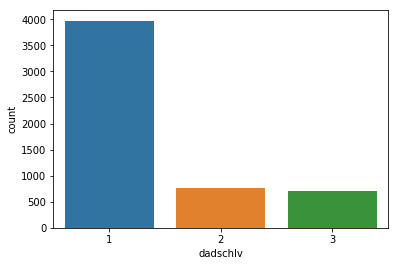

In [175]:
#show people who answer this question
data_dadleftsch=data.loc[data['dadschlv']!=99]
data_dadleftsch=data_dadleftsch.loc[data_dadleftsch['dadschlv']!=4]
sns.countplot(x='dadschlv',data=data_dadleftsch)

# (sex包含了问卷和没有填写的，数据不准)sex

In [176]:
data['sex'].unique()

array([1, 2])

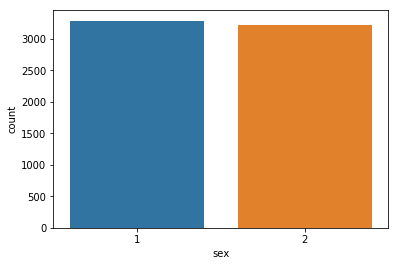

In [177]:
sns.countplot(x='sex',data=data)

# born(don't calculate month)

In [178]:
data['yearb'].unique()

array([68, 69, 67, 63, 65, 66])

In [179]:
data['yearb'].value_counts()

68    5721
69     512
67     264
65       2
63       1
66       1
Name: yearb, dtype: int64

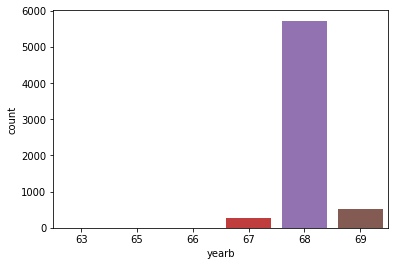

In [180]:
sns.countplot(x='yearb',data=data)